## Overview Bayesian A/B Testing

Bayesian A/B testing is a statistical methods used to compare two or more variants (e.g., different marketing strategies) and determine which variant is more effective. Unlike traditional A/B testing, which typically relies on frequentist statistics, Bayesian A/B testing uses Bayesian inferences to update the probability of each variant being the best as new data is observed.

**Key Concepts**

  1. *Prior Distribution*: Represents the initial belief about the parameters before observing any data.
  2. *Likelihood*: Indicate the probability of observing the data given the parameters.
  3. *Posterior Distribution*: Updated belief about the parameters after observing the data, calculated using Bayes' theorem.
  4. *Credible Interval*: The Bayesian equivalent of a confidence interval, representing the range within which the true parameter values lies with a certain probability.

Here is an example of comparing two versions of mortgage discount strategies (strategy A and Strategy B) to see which one has a higher conversion rate.

**Scenario**:
* Strategy A: Received 1000 mortgage cases and 100 conversions (10% conversion rate)
* Strategy B: Received 1000 mortgage cases and 120 conversions (12% conversion rate)

Goal: Using Bayesian inference to determine the probability that the strategy B is better than A.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Data for strategy A
cases_A = 1000
conversions_A = 100

# Data for strategy B
cases_B = 1000
conversions_B = 120

In [3]:
# prior distribution (assuming a uniform prior for simplicity)
alpha_prior = 1
beta_prior =1

In [5]:
# posterior distributions using the beta distribution
alpha_A = conversions_A + alpha_prior
beta_A = cases_A-conversions_A + beta_prior

alpha_B = conversions_B + alpha_prior
beta_B = cases_B - conversions_B + beta_prior

In [6]:
# generate samples from the posterior distributions
samples_A = np.random.beta(alpha_A, beta_A, 10000)
samples_B = np.random.beta(alpha_B, beta_B, 10000)

In [14]:
# calculate the probability that B is better than A
prob_B_better_than_A = np.mean(samples_B > samples_A)
print(f"Probability that strategy B is better than strategy A: {prob_B_better_than_A:.2%}")

Probability that strategy B is better than strategy A: 91.91%


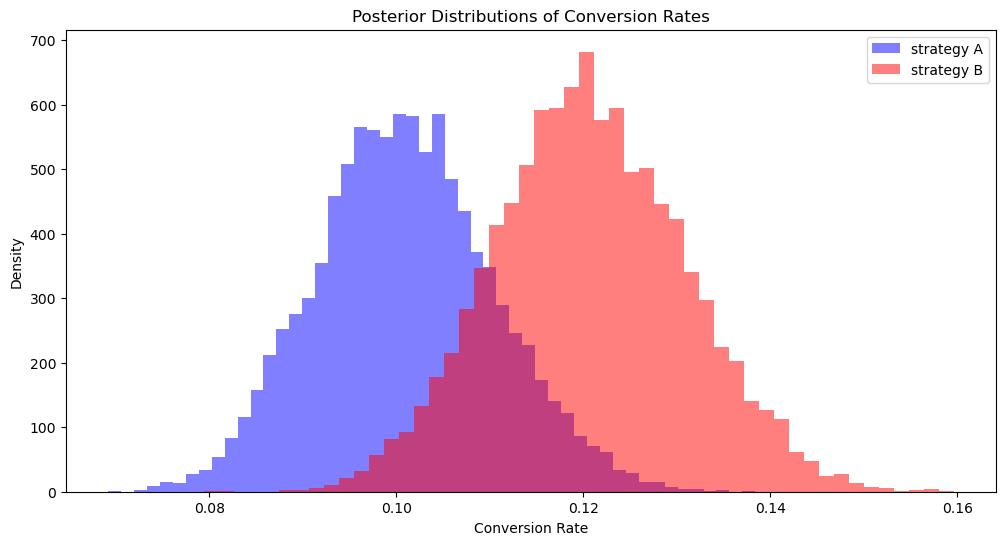

In [18]:
# plot the posterior distributions
plt.figure(figsize = (12,6))
plt.hist(samples_A, bins=50, alpha=0.5, label = "strategy A", color = "blue")
plt.hist(samples_B, bins = 50, alpha = 0.5, label = "strategy B", color = "red")
plt.title("Posterior Distributions of Conversion Rates")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.show()